In [152]:
import pandas as pd
import numpy as np
import datetime

In [153]:
import pandas as pd, numpy as np
from datetime import datetime
import statsmodels.api as sm
import yfinance as yf
import time, urllib
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# 导入自己的模块
from data_download_US_HK import *
from strategies import *
from positions import *

In [154]:
us_db_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"

data = pd.read_csv(us_db_path+"TQQQ.csv")

In [155]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000,TQQQ
1,2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800,TQQQ
2,2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600,TQQQ
3,2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400,TQQQ
4,2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400,TQQQ
...,...,...,...,...,...,...,...,...
2816,2021-04-21,105.000000,109.230003,104.019997,109.070000,109.070000,27764300,TQQQ
2817,2021-04-22,108.669998,109.629997,103.940002,105.099998,105.099998,43712100,TQQQ
2818,2021-04-23,105.720001,110.320000,105.720001,109.059998,109.059998,26921500,TQQQ
2819,2021-04-26,109.309998,111.470001,108.550003,111.220001,111.220001,24994200,TQQQ


In [156]:
data_macd = PRICE_VOL_INDICATORS.MACD(data, "Adj Close",12, 26, 9)

In [157]:
data_macd = data_macd[data_macd['Date']>'2010-01-01']

# 1. 计算MACD平均+/-的平均连续长度

In [158]:
positive_macd_lengths = []
negative_macd_lengths = []
dt_pos = []
dt_neg = []

In [159]:
each_pos_macd_group = []
each_neg_macd_group = []

for i, item in enumerate(data_macd['MACD']):
    dt = data_macd['Date'].values[i]
    
    try: 
        if data_macd['MACD'].values[i-1]<0 and data_macd['MACD'].values[i]>0:
            print(dt, ": MACD转正")
            each_pos_macd_group.append("MACD转正")

        elif data_macd['MACD'].values[i-1]>0 and data_macd['MACD'].values[i]<0:
            print(dt, ": MACD转负")
            each_neg_macd_group.append("MACD转负")

        if data_macd['MACD'].values[i]>0:
            print(dt, ": MACD为正")
            macd_i_pos = data_macd['MACD'].values[i]
            dt_pos.append(dt)
            each_pos_macd_group.append(macd_i_pos)


        elif data_macd['MACD'].values[i]<0:
            print(dt, ": MACD为负")
            macd_i_neg = data_macd['MACD'].values[i]
            dt_neg.append(dt)
            each_neg_macd_group.append(macd_i_neg)
            
    except Exception as e:
        print(e)

2010-03-29 : MACD为负
2010-03-30 : MACD转正
2010-03-30 : MACD为正
2010-03-31 : MACD转负
2010-03-31 : MACD为负
2010-04-01 : MACD为负
2010-04-05 : MACD为负
2010-04-06 : MACD转正
2010-04-06 : MACD为正
2010-04-07 : MACD转负
2010-04-07 : MACD为负
2010-04-08 : MACD为负
2010-04-09 : MACD转正
2010-04-09 : MACD为正
2010-04-12 : MACD为正
2010-04-13 : MACD为正
2010-04-14 : MACD为正
2010-04-15 : MACD为正
2010-04-16 : MACD为正
2010-04-19 : MACD为正
2010-04-20 : MACD为正
2010-04-21 : MACD为正
2010-04-22 : MACD为正
2010-04-23 : MACD为正
2010-04-26 : MACD为正
2010-04-27 : MACD转负
2010-04-27 : MACD为负
2010-04-28 : MACD为负
2010-04-29 : MACD为负
2010-04-30 : MACD为负
2010-05-03 : MACD为负
2010-05-04 : MACD为负
2010-05-05 : MACD为负
2010-05-06 : MACD为负
2010-05-07 : MACD为负
2010-05-10 : MACD为负
2010-05-11 : MACD为负
2010-05-12 : MACD为负
2010-05-13 : MACD为负
2010-05-14 : MACD为负
2010-05-17 : MACD为负
2010-05-18 : MACD为负
2010-05-19 : MACD为负
2010-05-20 : MACD为负
2010-05-21 : MACD为负
2010-05-24 : MACD为负
2010-05-25 : MACD为负
2010-05-26 : MACD为负
2010-05-27 : MACD为负
2010-05-28 : MACD为负


2012-08-08 : MACD为正
2012-08-09 : MACD为正
2012-08-10 : MACD为正
2012-08-13 : MACD为正
2012-08-14 : MACD为正
2012-08-15 : MACD为正
2012-08-16 : MACD为正
2012-08-17 : MACD为正
2012-08-20 : MACD为正
2012-08-21 : MACD为正
2012-08-22 : MACD为正
2012-08-23 : MACD为正
2012-08-24 : MACD为正
2012-08-27 : MACD为正
2012-08-28 : MACD为正
2012-08-29 : MACD转负
2012-08-29 : MACD为负
2012-08-30 : MACD为负
2012-08-31 : MACD为负
2012-09-04 : MACD为负
2012-09-05 : MACD为负
2012-09-06 : MACD为负
2012-09-07 : MACD为负
2012-09-10 : MACD为负
2012-09-11 : MACD为负
2012-09-12 : MACD为负
2012-09-13 : MACD为负
2012-09-14 : MACD转正
2012-09-14 : MACD为正
2012-09-17 : MACD为正
2012-09-18 : MACD为正
2012-09-19 : MACD为正
2012-09-20 : MACD为正
2012-09-21 : MACD为正
2012-09-24 : MACD为正
2012-09-25 : MACD转负
2012-09-25 : MACD为负
2012-09-26 : MACD为负
2012-09-27 : MACD为负
2012-09-28 : MACD为负
2012-10-01 : MACD为负
2012-10-02 : MACD为负
2012-10-03 : MACD为负
2012-10-04 : MACD为负
2012-10-05 : MACD为负
2012-10-08 : MACD为负
2012-10-09 : MACD为负
2012-10-10 : MACD为负
2012-10-11 : MACD为负
2012-10-12 : MACD为负


2017-03-22 : MACD为负
2017-03-23 : MACD为负
2017-03-24 : MACD为负
2017-03-27 : MACD为负
2017-03-28 : MACD为负
2017-03-29 : MACD为负
2017-03-30 : MACD为负
2017-03-31 : MACD为负
2017-04-03 : MACD为负
2017-04-04 : MACD为负
2017-04-05 : MACD为负
2017-04-06 : MACD为负
2017-04-07 : MACD为负
2017-04-10 : MACD为负
2017-04-11 : MACD为负
2017-04-12 : MACD为负
2017-04-13 : MACD为负
2017-04-17 : MACD为负
2017-04-18 : MACD为负
2017-04-19 : MACD为负
2017-04-20 : MACD为负
2017-04-21 : MACD为负
2017-04-24 : MACD转正
2017-04-24 : MACD为正
2017-04-25 : MACD为正
2017-04-26 : MACD为正
2017-04-27 : MACD为正
2017-04-28 : MACD为正
2017-05-01 : MACD为正
2017-05-02 : MACD为正
2017-05-03 : MACD为正
2017-05-04 : MACD为正
2017-05-05 : MACD为正
2017-05-08 : MACD为正
2017-05-09 : MACD为正
2017-05-10 : MACD为正
2017-05-11 : MACD为正
2017-05-12 : MACD为正
2017-05-15 : MACD为正
2017-05-16 : MACD为正
2017-05-17 : MACD转负
2017-05-17 : MACD为负
2017-05-18 : MACD为负
2017-05-19 : MACD为负
2017-05-22 : MACD为负
2017-05-23 : MACD为负
2017-05-24 : MACD为负
2017-05-25 : MACD转正
2017-05-25 : MACD为正
2017-05-26 : MACD为正


In [160]:
# NEG
split_points_neg = []
for i, item in enumerate(each_neg_macd_group):
    if item =='MACD转负':
        split_points_neg.append(i)
        
# POS
split_points_pos = []
for i, item in enumerate(each_pos_macd_group):
    if item =='MACD转正':
        split_points_pos.append(i)

In [161]:
# NEG
from itertools import chain

# The indexes to split at

# Given list
# print("Given list : ", str(each_neg_macd_group))

# Split at
# print("The points of splitting : ",split_points_neg)

# to perform custom list split
sublists_neg = zip(chain([0], split_points_neg), chain(split_points_neg, [None]))
split_list_neg = list(each_neg_macd_group[i : j] for i, j in sublists_neg)

sublists_pos = zip(chain([0], split_points_pos), chain(split_points_pos, [None]))
split_list_pos = list(each_pos_macd_group[i : j] for i, j in sublists_pos)
# printing result
# print("The split lists are : ", split_list_neg)

# POS

all_pos_macd_count = []
for list_ in split_list_pos:
    pos_macd_count = len(list_)-1
    all_pos_macd_count.append(pos_macd_count)

# NEG

all_neg_macd_count = []
for list_ in split_list_neg:
    neg_macd_count = len(list_)-1
    all_neg_macd_count.append(neg_macd_count)

In [172]:
description(pd.Series(all_pos_macd_count))

NameError: name 'description' is not defined

In [173]:
print("2010年至今，TQQQ连续一段正值MACD可以维持的天数平均为：", round(pd.Series(all_pos_macd_count).describe()))

2010年至今，TQQQ连续一段正值MACD可以维持的天数平均为： count    113.0
mean      14.0
std       11.0
min       -1.0
25%        5.0
50%       12.0
75%       20.0
max       54.0
dtype: float64


In [ ]:
print("2010年至今，TQQQ连续一段负值MACD可以维持的天数平均为：", round(pd.Series(all_neg_macd_count).description()))

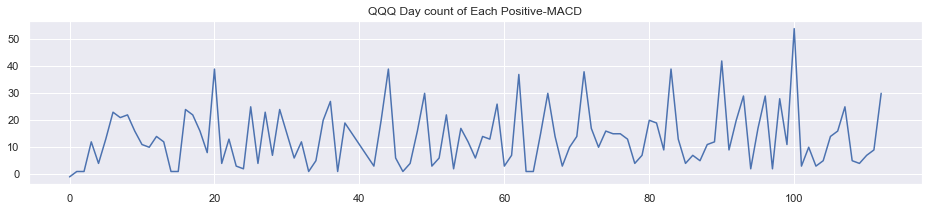

In [164]:
pd.Series(all_pos_macd_count).plot(figsize = (16,3));
plt.title("QQQ Day count of Each Positive-MACD");

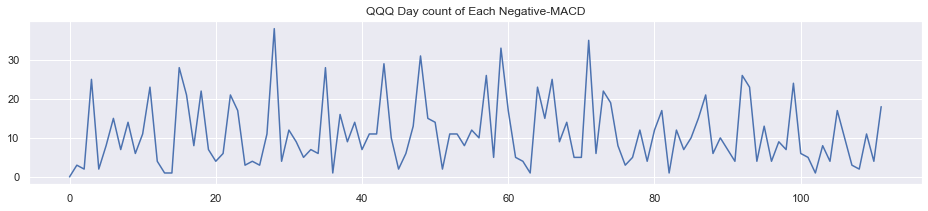

In [165]:
pd.Series(all_neg_macd_count).plot(figsize = (16,3));
plt.title("QQQ Day count of Each Negative-MACD");